In [ ]:
!pip install opencv-python

Original Image:


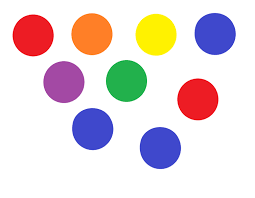

Red Color Detection:


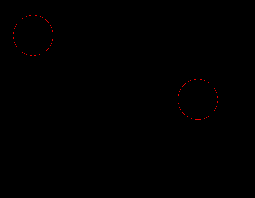

Level 0:


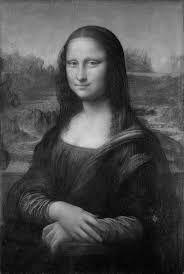

Level 1:


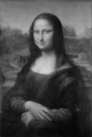

Level 2:


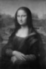

Level 3:


Level 4:


Original Image:


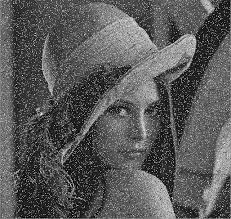

Smoothed Image:


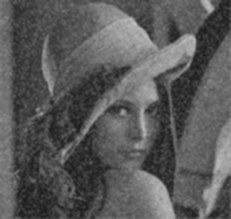

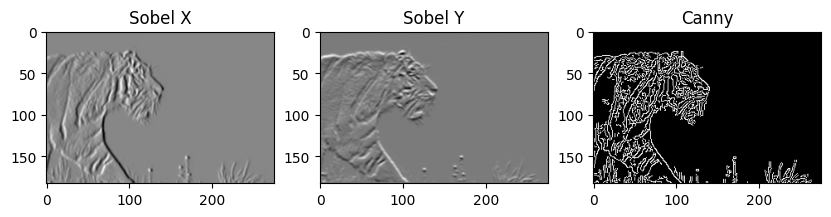

Face Detection Result:


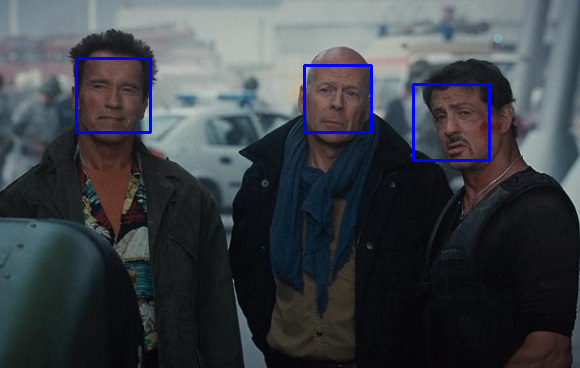

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def color_detection(image_path):
    image = cv2.imread(image_path)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_red = np.array([0, 120, 70])
    upper_red = np.array([10, 255, 255])
    mask = cv2.inRange(hsv, lower_red, upper_red)
    result = cv2.bitwise_and(image, image, mask=mask)
    print("Original Image:")
    cv2_imshow(image)
    print("Red Color Detection:")
    cv2_imshow(result)

def compute_t_pyramid(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    pyramid = [image]
    for _ in range(4):
        image = cv2.pyrDown(image)
        pyramid.append(image)

    for i, img in enumerate(pyramid):
        print(f"Level {i}:")
        cv2_imshow(img)

def image_smoothing(image_path):
    image = cv2.imread(image_path)
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    print("Original Image:")
    cv2_imshow(image)
    print("Smoothed Image:")
    cv2_imshow(blurred)

def edge_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    canny = cv2.Canny(image, 100, 200)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 3, 1)
    plt.imshow(sobelx, cmap='gray')
    plt.title('Sobel X')

    plt.subplot(1, 3, 2)
    plt.imshow(sobely, cmap='gray')
    plt.title('Sobel Y')

    plt.subplot(1, 3, 3)
    plt.imshow(canny, cmap='gray')
    plt.title('Canny')

    plt.show()

def object_detection(image_path):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x + w, y + h), (255, 0, 0), 2)

    print("Face Detection Result:")
    cv2_imshow(image)

# Trying out with Images...
color_detection('first.png')
compute_t_pyramid('second.jpg')
image_smoothing('third.jpg')
edge_detection('four.jpg')
object_detection('five.jpg')